In [1]:
import json

import matplotlib.pyplot as plt

from train_segmenter import *

In [2]:
with open('../configs.json') as f:
    configs = json.load(f)

In [3]:
def visualize(X, y_true, y_pred):

    fig, ax = plt.subplots(len(X), 3, figsize=(10, 100))
    for i in range(len(X)):
        ax[i, 0].imshow(X[i].squeeze(), cmap='gray')
        ax[i, 1].imshow(y_true[i].squeeze(), cmap='gray')
        ax[i, 2].imshow(y_pred[i].squeeze(), cmap='gray')
    plt.show()

In [4]:
model_file_name = os.path.join(configs['model_path'], configs['model_name']+'.tf')

segmenter = Segmenter(configs['encoder_n_filters'], configs['decoder_n_filters'])
segmenter.load_weights(model_file_name)

2022-03-10 08:28:26.894254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 08:28:26.900617: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 08:28:26.901251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 08:28:26.902087: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

2022-03-10 08:28:27.955799: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


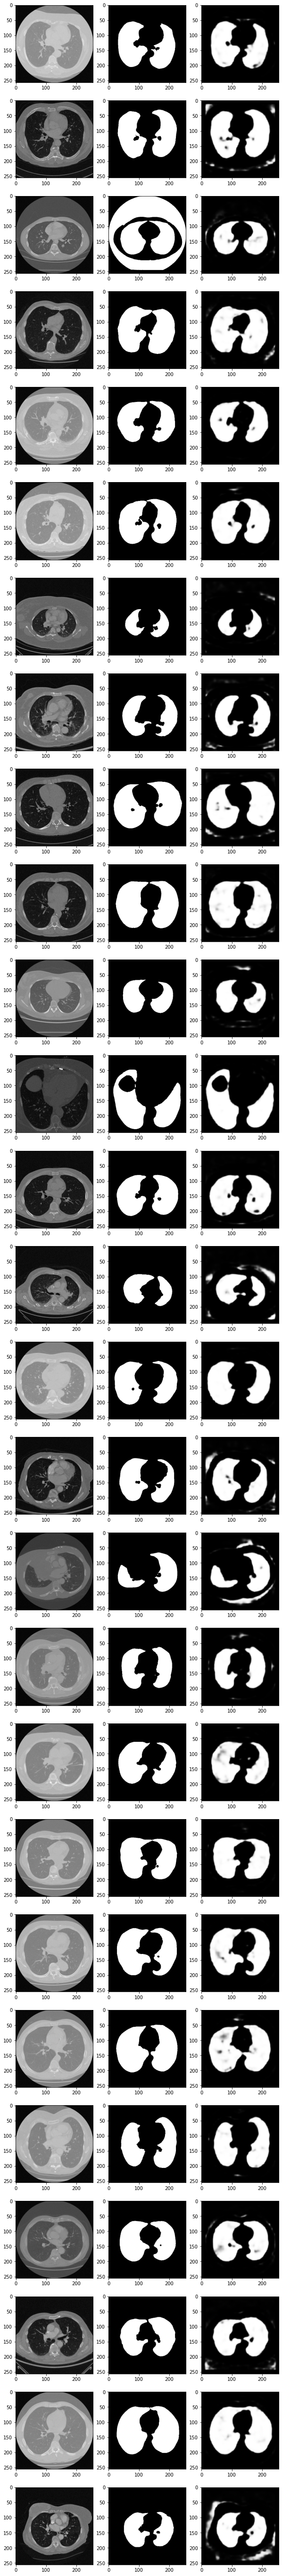

In [5]:
X_valid = TrainSegmenter.load_data(configs['data_path'], 'X_valid')
y_valid_true = TrainSegmenter.load_data(configs['data_path'], 'y_valid')
y_valid_pred = segmenter.predict(X_valid)

visualize(X_valid, y_valid_true, y_valid_pred)